<a href="https://colab.research.google.com/github/nirmalpate/Revenue_Forecasting_/blob/main/Revenue_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
# Data Preparations

In [5]:
df = pd.read_csv('/content/fact_marketing_performance.csv',sep = ';')

In [7]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-3532345252.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [16]:
daily_sales = df.groupby('date')['revenue'].sum().reset_index()

In [19]:
daily_sales = daily_sales.set_index('date').asfreq('D').fillna(0)

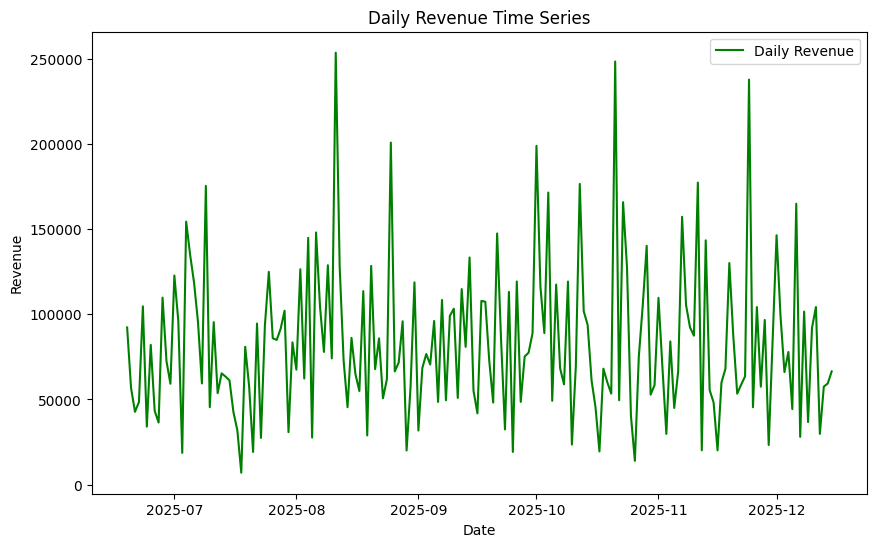

In [23]:
plt.figure(figsize = (10,6))
plt.plot(daily_sales.index, daily_sales['revenue'], label='Daily Revenue', color='green')
plt.title('Daily Revenue Time Series')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

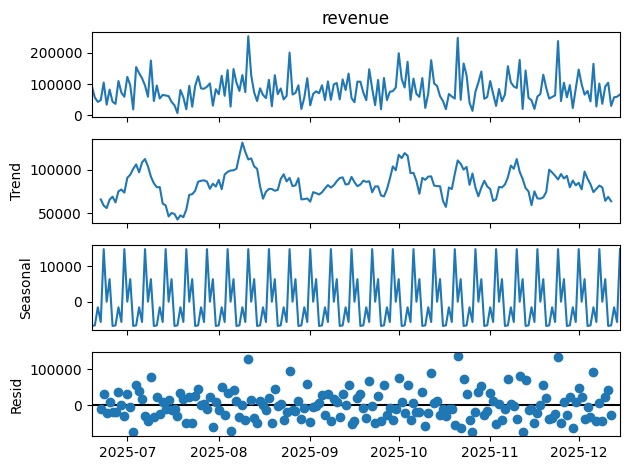

In [24]:
decomposition = seasonal_decompose(daily_sales['revenue'],model = 'addictive',period = 7)
decomposition.plot()
plt.show()

In [25]:
# Moving Average

In [26]:
daily_sales['7D_Moving_Average'] = daily_sales['revenue'].rolling(window=7).mean()

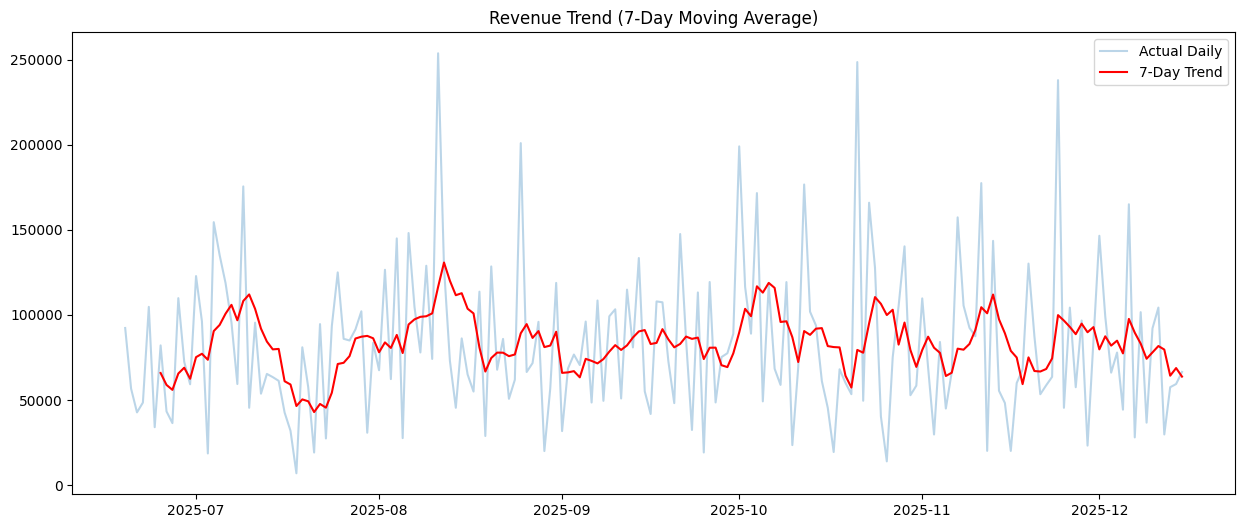

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['revenue'], alpha=0.3, label='Actual Daily')
plt.plot(daily_sales['7D_Moving_Average'], color='red', label='7-Day Trend')
plt.title('Revenue Trend (7-Day Moving Average)')
plt.legend()
plt.show()

In [29]:
model = ExponentialSmoothing(daily_sales['revenue'],
                             trend = 'add',
                             seasonal = 'add',
                             seasonal_periods=7).fit()

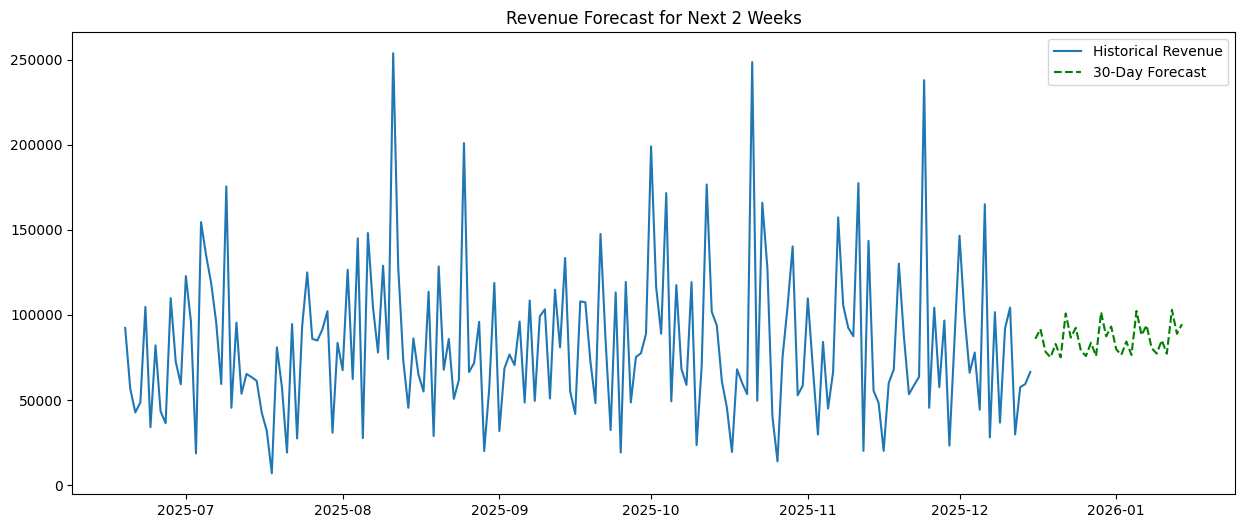

Time Series Analysis Complete.


In [34]:
forecast = model.forecast(30)

# --- 5. PLOT FORECAST ---
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['revenue'], label='Historical Revenue')
plt.plot(forecast, label='30-Day Forecast', color='green', linestyle='--')
plt.title('Revenue Forecast for Next 2 Weeks')
plt.legend()
plt.show()

print("Time Series Analysis Complete.")